In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

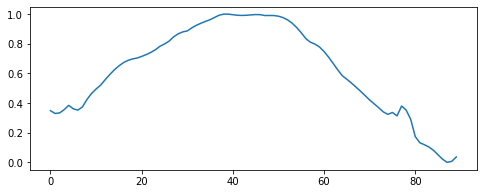

In [78]:
with open("dicts/nonnorm_nonencoded_horizon_dict_numpoints1000_pointseed123.json") as f:
    data = json.load(f)
for k,v in data.items():
    break
sample_horizon = np.array(v[30:120])
sample_horizon = (sample_horizon - np.min(sample_horizon)) / (np.max(sample_horizon) - np.min(sample_horizon))
#print(sample_horizon)

fig = plt.figure(figsize=(8,3))
plt.plot([v for v in range(90)], sample_horizon)
plt.show()

In [6]:
files = [
    "dicts/normalized_encoded_horizon_dict_window90_bands30_random_seed42.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands30_odds3.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands30_q4.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands30_multi4.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands30_multi4b.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_random_seed42.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_odds3.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_q4.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_multi4.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands45_multi4b.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_random_seed42.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_odds3.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_q4.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_multi4.json",
    "dicts/normalized_encoded_horizon_dict_window90_bands60_multi4b.json"
]

In [8]:
for fi in files:
    with open(fi) as f:
        data = json.load(f)
    total_keys = 0
    total_values = 0
    for k,v in data.items():
        total_keys += 1
        total_values += len(v)
    print(fi)
    print(total_keys)
    #print(total_values)
    print('average:', total_values/total_keys)
    print()

dicts/normalized_encoded_horizon_dict_window90_bands30_random_seed42.json
47032
average: 7.654362986902535

dicts/normalized_encoded_horizon_dict_window90_bands30_odds3.json
47720
average: 7.5440067057837386

dicts/normalized_encoded_horizon_dict_window90_bands30_q4.json
78057
average: 4.612014297244322

dicts/normalized_encoded_horizon_dict_window90_bands30_multi4.json
272750
average: 1.319890009165903

dicts/normalized_encoded_horizon_dict_window90_bands30_multi4b.json
283826
average: 1.2683827415388302

dicts/normalized_encoded_horizon_dict_window90_bands45_random_seed42.json
123765
average: 2.9087383347473033

dicts/normalized_encoded_horizon_dict_window90_bands45_odds3.json
146732
average: 2.453452552953684

dicts/normalized_encoded_horizon_dict_window90_bands45_q4.json
163264
average: 2.2050176401411212

dicts/normalized_encoded_horizon_dict_window90_bands45_multi4.json
306518
average: 1.1744824121258783

dicts/normalized_encoded_horizon_dict_window90_bands45_multi4b.json
325878


In [16]:
# fig = plt.figure(figsize=(8,3))
# plt.gcf().subplots_adjust(bottom=0.15)
# window_size = 90
# bands = 45
# x = [int(x) for x in np.linspace(0, window_size, bands, endpoint=False)]
# odds3 = [0.1, 0.3, 0.7, 0.9]*(bands//4)
# odds3 += odds3[:bands%4]
# plt.plot(x,odds3,".")
# plt.title("Deterministic thresholds\n(0.1, 0.3, 0.7, 0.9) over 45 bands")
# plt.ylim(0,1)
# plt.ylabel("Threshold")
# plt.xlabel("FoV degrees")
# plt.savefig("images/thresholds_deterministic_odds2.png")
# plt.show()

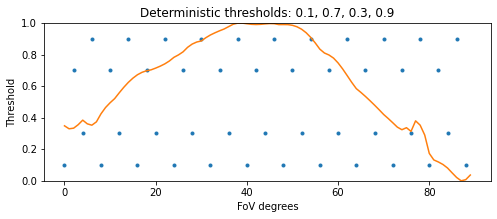

In [79]:
fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
window_size = 90
bands = 45
x = [int(x) for x in np.linspace(0, window_size, bands, endpoint=False)]
odds3 = [0.1, 0.7, 0.3, 0.9]*(bands//4)
odds3 += odds3[:bands%4]
plt.plot(x, odds3, ".")
plt.plot([v for v in range(90)], sample_horizon)
plt.title("Deterministic thresholds: 0.1, 0.7, 0.3, 0.9")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_deterministic_odds3.png")
plt.show()

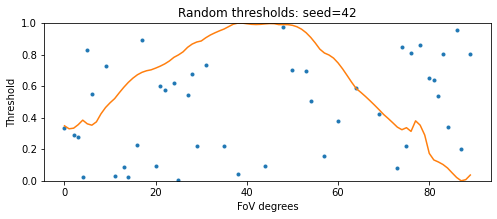

In [80]:
seed = 42
# generate the thresholds
random.seed(seed)
thresholds = [random.random() for i in range(bands)] # instead of range(window_size)
#thresholds = np.asarray(thresholds)
#thresholds *= 0.9 # to leave wiggle room at the top since we're doing "> threshold"
random.seed(seed)
indices = random.sample(range(window_size), bands)

fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.plot(indices,thresholds,".")
plt.plot([v for v in range(90)], sample_horizon)
plt.title("Random thresholds: seed=42")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_random42.png")
plt.show()

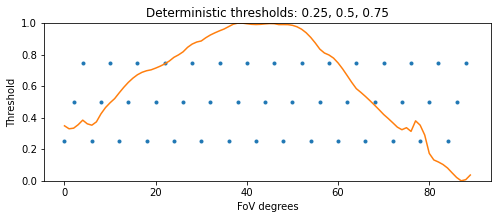

In [81]:
fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
window_size = 90
bands = 45
x = [int(x) for x in np.linspace(0, window_size, bands, endpoint=False)]
odds3 = [0.25, 0.5, 0.75]*(bands//3)
odds3 += odds3[:bands%3]
plt.plot(x, odds3, ".")
plt.plot([v for v in range(90)], sample_horizon)
plt.title("Deterministic thresholds: 0.25, 0.5, 0.75")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_deterministic_q4.png")
plt.show()

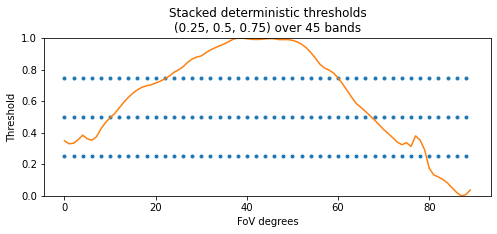

In [82]:
fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
window_size = 90
bands = 45
x = [int(x) for x in np.linspace(0, window_size, bands, endpoint=False)]
# odds3 = [0.25, 0.5, 0.75]*(bands//3)
# odds3 += odds3[:bands%3]

multi4 = []
x2 = []
for i in range(bands):
    for j in range(3):
        x2.append(x[i])
    multi4.append(0.25)
    multi4.append(0.5)
    multi4.append(0.75)

plt.plot(x2, multi4, ".")
plt.plot([v for v in range(90)], sample_horizon)
plt.title("Stacked deterministic thresholds\n(0.25, 0.5, 0.75) over 45 bands")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_deterministic_multi4.png")
plt.show()

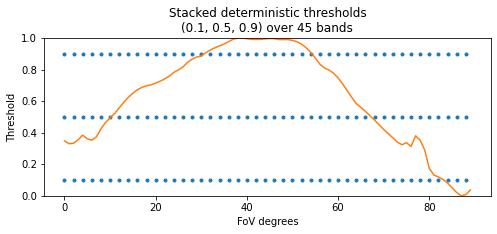

In [83]:
fig = plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
window_size = 90
bands = 45
x = [int(x) for x in np.linspace(0, window_size, bands, endpoint=False)]
# odds3 = [0.25, 0.5, 0.75]*(bands//3)
# odds3 += odds3[:bands%3]

multi4 = []
x2 = []
for i in range(bands):
    for j in range(3):
        x2.append(x[i])
    multi4.append(0.1)
    multi4.append(0.5)
    multi4.append(0.9)

plt.plot(x2, multi4, ".")
plt.plot([v for v in range(90)], sample_horizon)
plt.title("Stacked deterministic thresholds\n(0.1, 0.5, 0.9) over 45 bands")
plt.ylim(0,1)
plt.ylabel("Threshold")
plt.xlabel("FoV degrees")
plt.savefig("images/thresholds_deterministic_multi4b.png")
plt.show()